### DISTINCT
Чтобы получить уникальные значения из столбца, воспользуемся ключевым словом DISTINCT.



In [ ]:
'''
SELECT DISTINCT
    type1
FROM sql.pokemon
'''
#Мы можем применять DISTINCT и для нескольких столбцов.

#Получим, например, все уникальные пары основного и дополнительного типов для покемонов.

#ЗапросДетализация
"""
SELECT DISTINCT
    type1,
    type2
FROM sql.pokemon
"""

### COUNT()
Давайте посчитаем количество строк в таблице. Для этого применим агрегатную функцию COUNT.

COUNT считает строки, а звёздочка (*) в аргументе функции означает, что считаются все строки, которые возвращает запрос.

Если в аргументе функции указать название столбца, функция обработает только строки с непустым значением.

Внутри функции COUNT мы можем также применять DISTINCT, чтобы вычислить количество уникальных значений.

- **COUNT** — вычисляет число непустых строк;
- **SUM** — вычисляет сумму;
- **AVG** — вычисляет среднее;
- **MAX** — вычисляет максимум;
- **MIN** — вычисляет минимум.

Функция	Типы аргумента	Тип результата	Частичный режим	Описание
- array_agg(выражение)	любой тип не массива	массив элементов с типом аргумента	Нет	входные значения, включая NULL, объединяются в массив
- array_agg(выражение)	любой тип массива	тот же, что и тип аргумента	Нет	входные массивы собираются в массив большей размерности (они должны иметь одну размерность и не могут быть пустыми или равны NULL)
- avg(выражение)	smallint, int, bigint, real, double precision, numeric или interval	numeric для любых целочисленных аргументов, double precision для аргументов с плавающей точкой, в противном случае тип данных аргумента	Да	арифметическое среднее для всех входных значений, отличных от NULL
- bit_and(выражение)	smallint, int, bigint или bit	тот же, что и тип аргумента	Да	побитовое И для всех входных значений, не равных NULL, или NULL, если таких нет
- bit_or(выражение)	smallint, int, bigint или bit	тот же, что и тип аргумента	Да	побитовое ИЛИ для всех входных значений, не равных NULL, или NULL, если таких нет
- bool_and(выражение)	bool	bool	Да	true, если все входные значения равны true, и false в противном случае
- bool_or(выражение)	bool	bool	Да	true, если хотя бы одно входное значение равно true, и false в противном случае
- count(*)	 	bigint	Да	количество входных строк
- count(выражение)	any	bigint	Да	количество входных строк, для которых значение выражения не равно NULL
- every(выражение)	bool	bool	Да	синоним bool_and
- json_agg(выражение)	any	json	Нет	агрегирует значения, включая NULL, в виде массива JSON
- jsonb_agg(выражение)	any	jsonb	Нет	агрегирует значения, включая NULL, в виде массива JSON
- json_object_agg(имя, значение)	(any, any)	json	Нет	агрегирует пары имя/значение в виде объекта JSON (NULL допускается в значениях, но не в именах)
- jsonb_object_agg(имя, значение)	(any, any)	jsonb	Нет	агрегирует пары имя/значение в виде объекта JSON (NULL допускается в значениях, но не в именах)
- max(выражение)	любой числовой, строковый, сетевой тип или тип даты/времени, либо массив этих типов	тот же, что и тип аргумента	Да	максимальное значение выражения среди всех входных данных, отличных от NULL
- min(выражение)	любой числовой, строковый, сетевой тип или тип даты/времени, либо массив этих типов	тот же, что и тип аргумента	Да	минимальное значение выражения среди всех входных данных, отличных от NULL
- string_agg(выражение, разделитель)	(text, text) или (bytea, bytea)	тот же, что и типы аргументов	Нет	входные данные (исключая NULL) складываются в строку через заданный разделитель
- sum(выражение)	smallint, int, bigint, real, double precision, numeric, interval или money	bigint для аргументов smallint или int, numeric для аргументов bigint, и тип аргумента в остальных случаях	Да	сумма значений выражения по всем входным данным, отличным от NULL
- xmlagg(выражение)	xml	xml	Нет	соединение XML-значений, отличных от NULL (см. также Подраздел 9.14.1.7)

In [ ]:
#/*Напишите запрос, который выведет:

#количество покемонов (столбец pokemon_count),
#среднюю скорость (столбец avg_speed),
#максимальное и минимальное число очков здоровья (столбцы max_hp и min_hp)
#для электрических (Electric) покемонов, имеющих дополнительный тип и показатели атаки или защиты больше 50.*/
"""
select
    count(*) "pokemon_count",
    avg(speed) "avg_speed",
    max(hp)"max_hp",
    min(hp)"max_hp"
from sql.pokemon
where type1 = 'Electric'
    and type2 is not Null
    and attack > 50
    and defense > 50
"""

### GROUP BY 
используется для определения групп выходных строк, к которым могут применяться агрегатные функции.

In [ ]:
"""
SELECT
    type1 AS pokemon_type,
    COUNT(*) AS pokemon_count
FROM sql.pokemon
GROUP BY type1
ORDER BY type1
"""

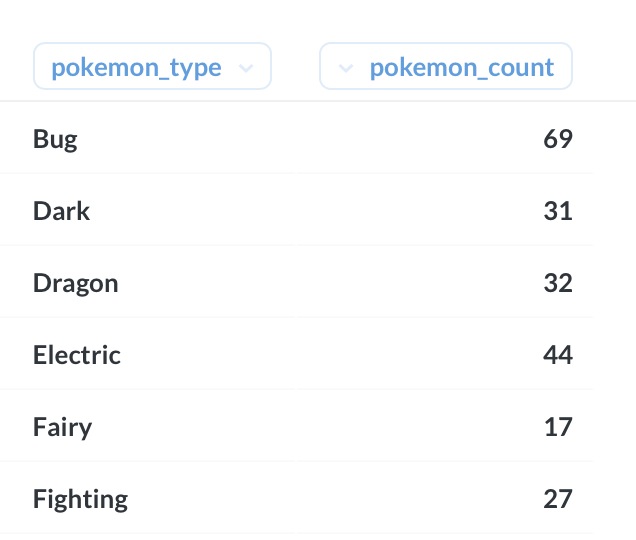

In [1]:
#/*Напишите запрос, который выведет:

#число различных дополнительных типов (столбец additional_types_count),
#среднее число очков здоровья (столбец avg_hp),
#сумму показателей атаки (столбец attack_sum) в разбивке по основным типам (столбец primary_type).
#Отсортируйте результат по числу дополнительных типов в порядке убывания, 
#при равенстве — по основному типу в алфавитном порядке. 
#Столбцы к выводу (обратите внимание на порядок!): primary_type, additional_types_count, avg_hp, attack_sum.*/
"""
select
    type1 as primary_type,
    count(DISTINCT type2) as additional_types_count,
    avg(hp) as avg_hp,
    sum(attack) as attack_sum
from sql.pokemon
group by type1
order by additional_types_count desc
"""


'\nselect\n    type1 as primary_type,\n    count(DISTINCT type2) as additional_types_count,\n    avg(hp) as avg_hp,\n    sum(attack) as attack_sum\nfrom sql.pokemon\ngroup by type1\norder by additional_types_count desc\n'

In [2]:
#/*Напишите запрос, который выведет основной и дополнительный типы покемонов (столбцы primary_type и additional_type) для тех, 
#у кого средний показатель атаки больше 100 и максимальный показатель очков здоровья меньше 80.*/
"""
select
    type1 as primary_type,
    type2 as additional_type
from sql.pokemon
group by type1,type2
having avg(attack) > 100
    and max(hp) < 80
"""

'\nselect\n    type1 as primary_type,\n    type2 as additional_type\nfrom sql.pokemon\ngroup by type1,type2\nhaving avg(attack) > 100\n    and max(hp) < 80\n'

In [ ]:
#/*Напишите запрос, чтобы для покемонов, чьё имя (name) начинается с S, 
#вывести столбцы с их основным типом (primary_type) и общим числом покемонов этого типа (pokemon_count). 
#Оставьте только те типы, у которых средний показатель защиты больше 80. 
#Выведите топ-3 типов по числу покемонов в них.*/
"""
select
    type1 as primary_type,
    count(type1) as pokemon_count
from sql.pokemon
where name like 'S%'
group by type1
having avg(defense) > 80
order by count(type1) desc
limit 3
"""

In [3]:
"""
SELECT
    столбец1 AS новое_название,
    столбец2,
    АГРЕГАТ(столбец3)
FROM таблица
WHERE (условие1 OR условие2)
    AND условие3
GROUP BY столбец1, столбец2
HAVING АГРЕГАТ(столбец3) > 5
ORDER BY сортировка1, сортировка2
OFFSET 1 LIMIT 2
"""

'\nSELECT\n    столбец1 AS новое_название,\n    столбец2,\n    АГРЕГАТ(столбец3)\nFROM таблица\nWHERE (условие1 OR условие2)\n    AND условие3\nGROUP BY столбец1, столбец2\nHAVING АГРЕГАТ(столбец3) > 5\nORDER BY сортировка1, сортировка2\nOFFSET 1 LIMIT 2\n'

In [ ]:
#/*Напишите запрос, который выведет основной и дополнительный типы покемонов и 
#средние значения по каждому показателю (столбцы avg_hp, avg_attack, avg_defense, avg_speed).
#Оставьте только те пары типов, у которых сумма этих четырёх показателей более 400..*/
"""
select
    type1,
    type2, 
    avg(hp) as avg_hp,
    avg(attack) as avg_attack,
    avg(defense)as avg_defense,
    avg(speed) as avg_speed
from sql.pokemon
group by type1,type2
having (avg(hp) + avg(attack) + avg(defense) + avg(speed)) > 400
"""

In [ ]:
#/*Напишите запрос, который выведет столбцы с основным типом покемона и общим количеством покемонов этого типа. 
#Учитывайте только тех покемонов, у кого или показатель атаки, или показатель защиты принимает значение между 50 и 100 включительно. 
#Оставьте только те типы покемонов, у которых максимальный показатель здоровья не больше 125. 
#Выведите только тот тип, который находится на пятом месте по количеству покемонов.*/
"""
select
    type1,
    count(type1)
from sql.pokemon
WHERE attack BETWEEN 50 AND 100
    or defense BETWEEN 50 AND 100
group by type1
having max(hp) < 125
order by count(type1) desc
offset 4 
limit 1
"""